In [1]:
import palantir
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import anndata
import os
import operator
import matplotlib.pyplot as plt

import sys
#python38

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)

# sc.logging.print_versions()
# sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable
plt.show()

In [2]:
print(palantir.__version__)

1.3.3


In [3]:
cd F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R\

F:\PROJECTS\PROJECT_HUMAN FETAL COCHLEAE\WORKPLACE\R


G:\Miniconda3\envs\scvi-env\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
adata = sc.read('Hu_sgn_python.h5ad')

G:\Miniconda3\envs\scvi-env\lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
adata

AnnData object with n_obs × n_vars = 143 × 36601
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [6]:
sc.pp.filter_genes(adata, min_cells=1)
adata

filtered out 13466 genes that are detected in less than 1 cells


AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells'
    obsm: 'X_pca', 'X_umap'

In [7]:
adata.obs['orig.ident']

Human_23W_AACAAGCCATTATGAC-1    HU_23W
Human_23W_ACGACTTAGTATCGCG-1    HU_23W
Human_23W_AGTTGCAGTTAGCAGC-1    HU_23W
Human_23W_CAAGCTAGTTGCATCT-1    HU_23W
Human_23W_CATAATCCATGTCGCG-1    HU_23W
                                 ...  
Human_26W_TGATCTTGTATGTCAC-1    HU_26W
Human_26W_TGATTTCGTGAGTCAG-1    HU_26W
Human_26W_TGCATCCCAAAGTGTA-1    HU_26W
Human_26W_TTACCGCGTGCCTTCT-1    HU_26W
Human_26W_TTTCACACAAGCACAG-1    HU_26W
Name: orig.ident, Length: 143, dtype: category
Categories (3, object): ['HU_23W', 'HU_25W', 'HU_26W']

In [8]:
X_scVI = pd.read_csv('human_sgn_scVI.csv', index_col=0)
adata.obsm["X_scVI"] = X_scVI.to_numpy()

In [9]:
adata

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells'
    obsm: 'X_pca', 'X_umap', 'X_scVI'

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


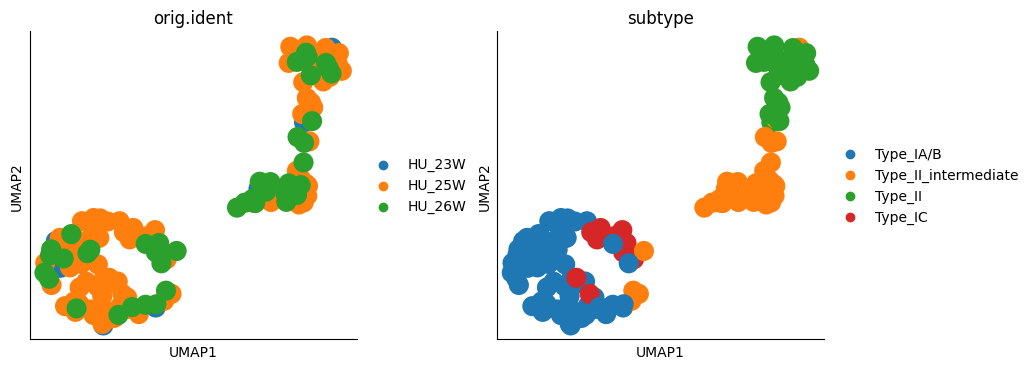

In [10]:
sc.pl.umap(adata, color=['orig.ident', 'subtype'], wspace=0.3)
plt.show()

In [11]:
ad=adata.copy()

In [12]:
#sc.pp.neighbors(adata_raw_scvi,n_neighbors=10,use_rep="X_scVI")
#sc.tl.leiden(adata_raw_scvi,resolution=1,key_added='clusters')#, min_dist=0.4

In [13]:
#sc.tl.umap(adata_raw_scvi)

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


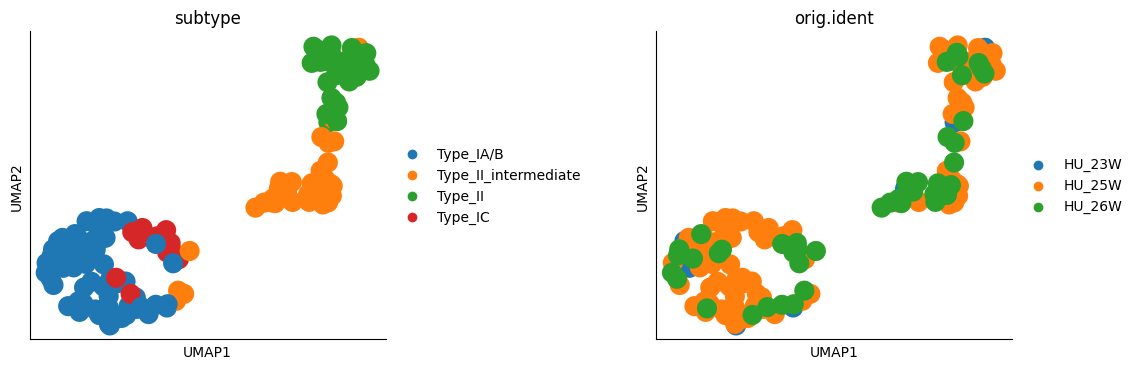

In [14]:
sc.pl.umap(
    ad,
    color=['subtype', "orig.ident"], 
    frameon=True,  wspace = 0.6
)#ncols = 1,
plt.show()

In [15]:
ad

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2'
    var: 'name', 'n_cells'
    uns: 'orig.ident_colors', 'subtype_colors'
    obsm: 'X_pca', 'X_umap', 'X_scVI'

In [16]:
print(palantir.__version__)

1.3.3


In [17]:
#pip install palantir==1.3.3

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


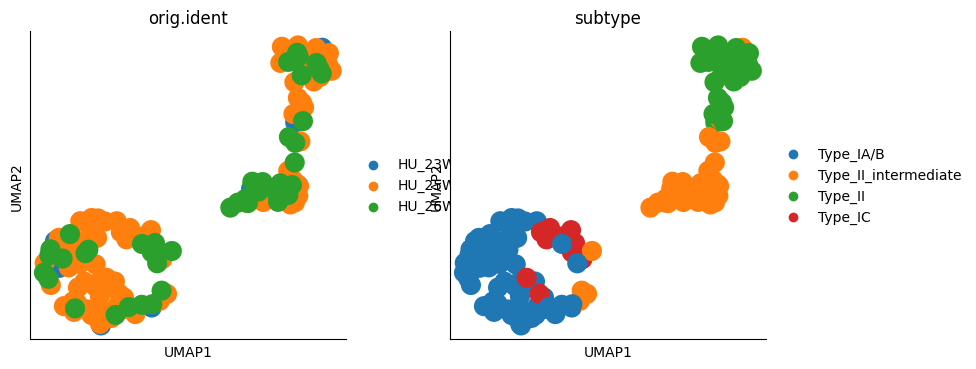

In [18]:
%matplotlib inline
sc.pl.umap(ad, color=['orig.ident', 'subtype'])

Find root cell

In [19]:
index, value = max(enumerate(ad[:,'PRPH'].X), key=operator.itemgetter(1))
start_cell = ad.obs.index[index]
start_cell

'Human_25W_TACAACGTCTACTTCA-1'

C:\Users\Dell\AppData\Local\Temp\ipykernel_28256\3752387706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad.obs['rootcell'][index] = 1


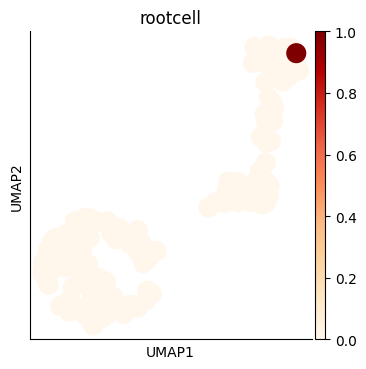

In [20]:
ad.uns['iroot'] = index
ad.obs['rootcell'] = 0
ad.obs['rootcell'][index] = 1

sc.pl.umap(ad,color='rootcell',color_map='OrRd')

In [21]:
start_cell

'Human_25W_TACAACGTCTACTTCA-1'

In [22]:
adata_count = ad.copy()
#sc.pp.filter_genes(adata_count, min_counts=3)
#sc.pp.filter_cells(adata_count, min_genes=3)
sc.pp.normalize_per_cell(adata_count, counts_per_cell_after=1e4)
sc.pp.log1p(adata_count)
sc.pp.highly_variable_genes(adata_count, n_top_genes=2000)

m = adata_count.X.toarray()
norm_df = pd.DataFrame(data=m, index=adata_count.obs_names, columns=adata_count.var_names)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [23]:
adata_count

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2', 'rootcell', 'n_counts'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'orig.ident_colors', 'subtype_colors', 'iroot', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_umap', 'X_scVI'

In [24]:
pca_projections, _ = palantir.utils.run_pca(adata_count)

computing PCA
    on highly variable genes
    with n_comps=142
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=48
    finished (0:00:00)


In [25]:
dm_res = palantir.utils.run_diffusion_maps(adata_count, n_components=5)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:09)


In [26]:
ms_data = palantir.utils.determine_multiscale_space(adata_count)

In [27]:
sc.pp.neighbors(adata_count)
sc.tl.umap(adata_count)

computing neighbors
    using 'X_pca' with n_pcs = 48
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


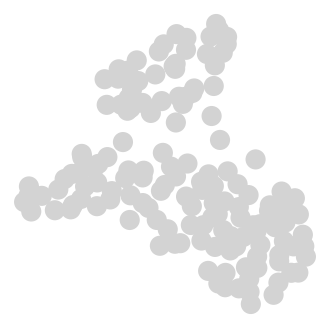

In [28]:
sc.pl.embedding(
    adata_count,
    basis="umap",
    frameon=False,
)

In [29]:
adata_count

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2', 'rootcell', 'n_counts'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'orig.ident_colors', 'subtype_colors', 'iroot', 'log1p', 'hvg', 'pca', 'DM_EigenValues', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_scVI', 'DM_EigenVectors', 'DM_EigenVectors_multiscaled'
    varm: 'PCs'
    obsp: 'DM_Kernel', 'DM_Similarity', 'distances', 'connectivities'

In [30]:
imputed_X = palantir.utils.run_magic_imputation(adata_count)

In [31]:
genes = ['CALB1', 'PRPH', 'GATA3', 'PBX3', 'RUNX1', 'ESRRG']

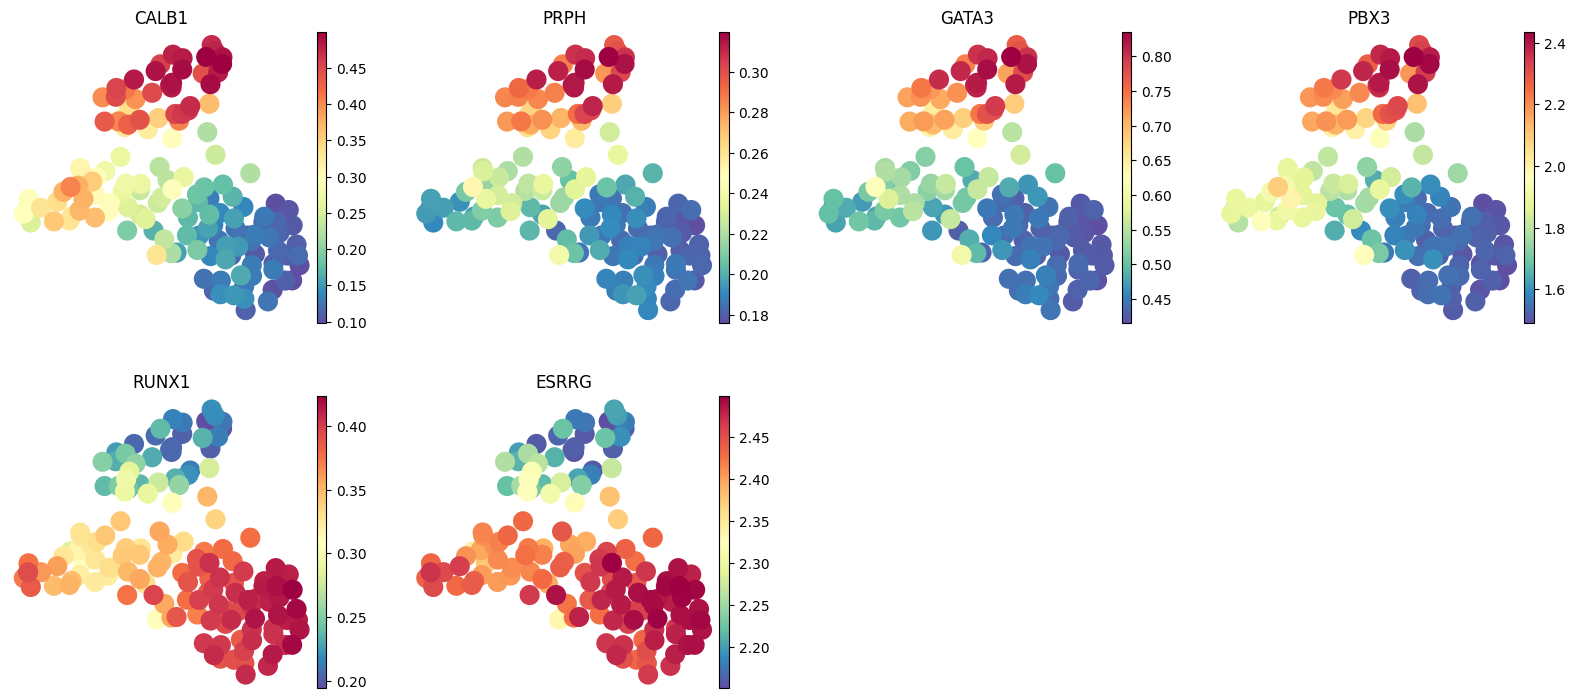

In [32]:
sc.pl.embedding(
    adata_count,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=genes,
    frameon=False,
)
plt.show()

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


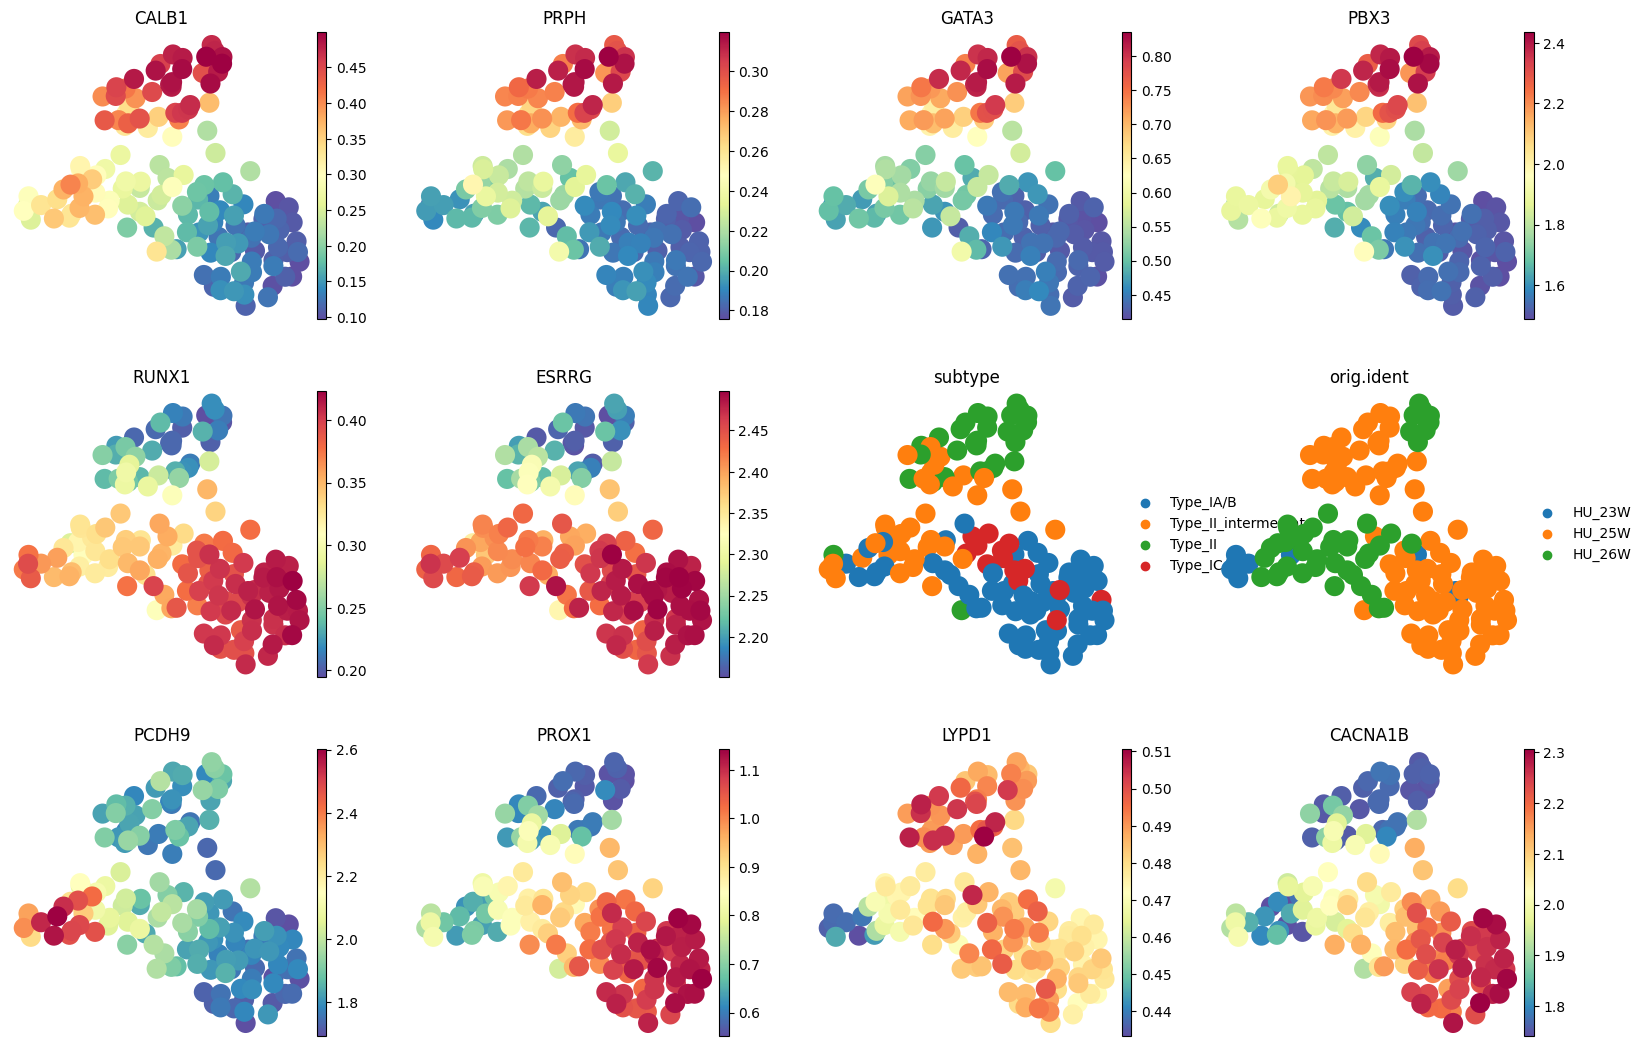

In [33]:
sc.pl.embedding(
    adata_count,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=['CALB1', 'PRPH', 'GATA3', 'PBX3', 'RUNX1', 'ESRRG','subtype','orig.ident',
           'PCDH9','PROX1','LYPD1','CACNA1B'
          ],
    frameon=False,
)
plt.show()

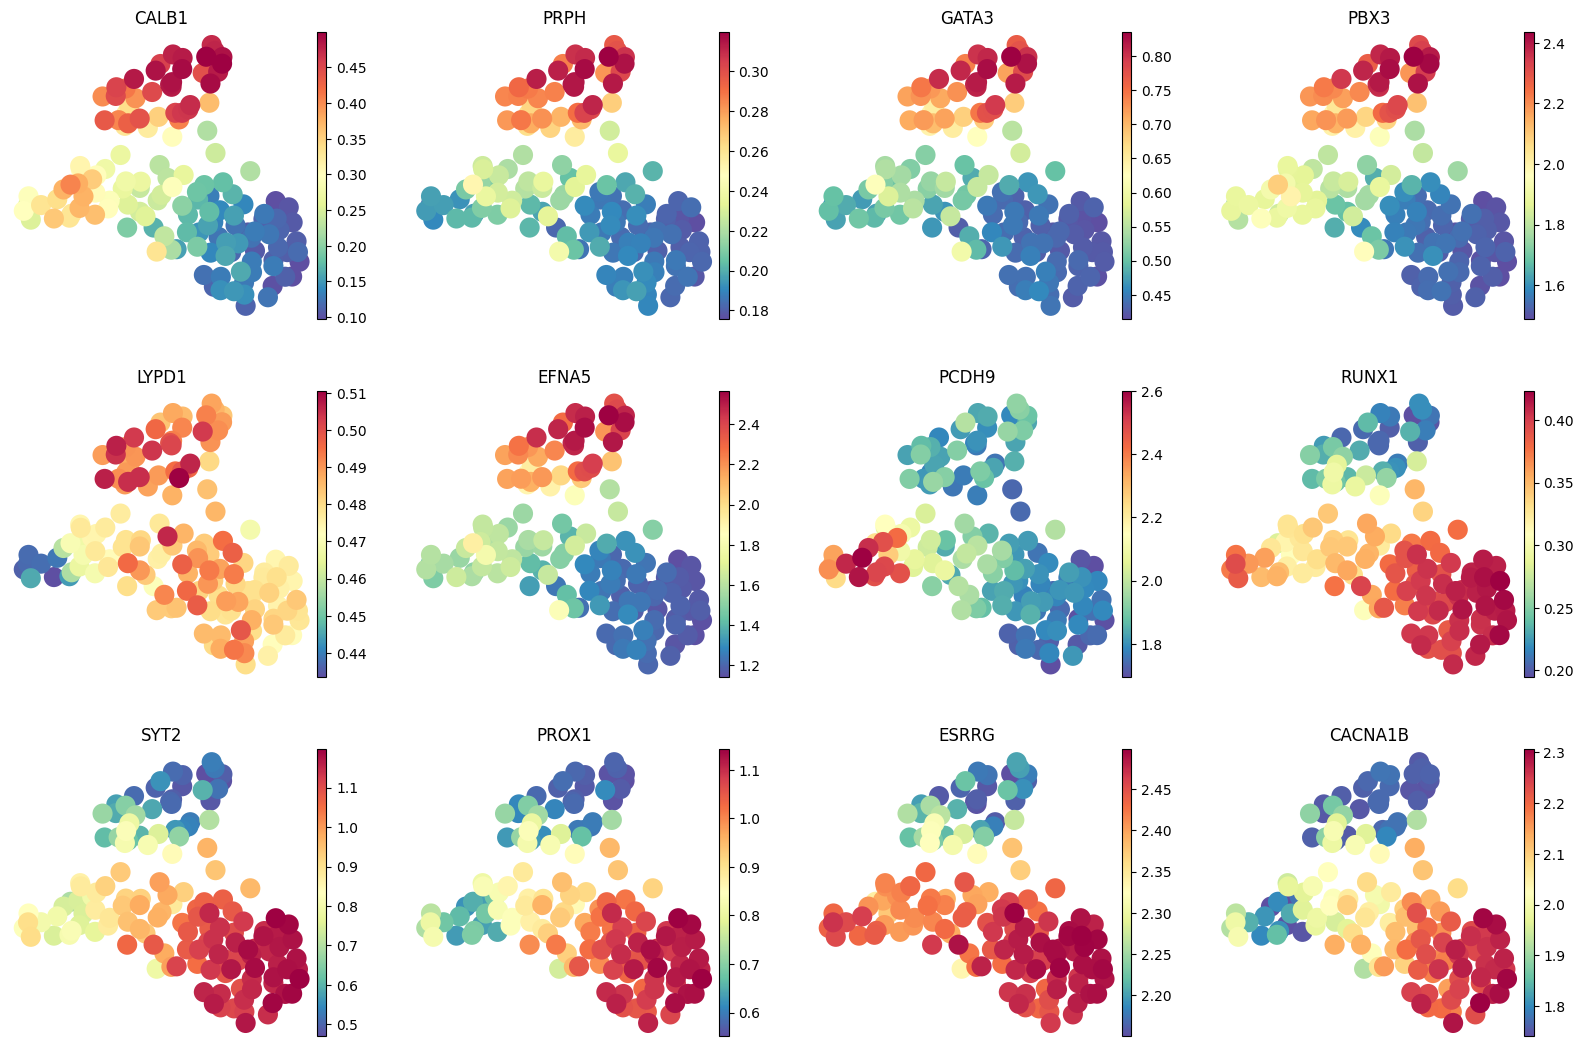

In [34]:
sc.pl.embedding(
    adata_count,
    basis="umap",
    layer="MAGIC_imputed_data",
    color=['CALB1', 'PRPH', 'GATA3','PBX3',
           'LYPD1','EFNA5','PCDH9','RUNX1',
           'SYT2','PROX1','ESRRG','CACNA1B'
           
          ],
    frameon=False,
)
plt.show()

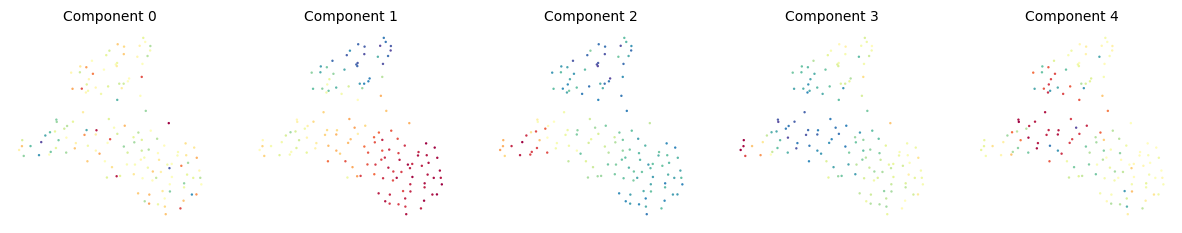

In [35]:
palantir.plot.plot_diffusion_components(adata_count)
plt.show()

In [36]:
adata_count

AnnData object with n_obs × n_vars = 143 × 23135
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'pHB', 'pRP', 'pMT', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.8', 'seurat_clusters', 'integrated_snn_res.1.2', 'integrated_snn_res.1.4', 'integrated_snn_res.1.8', 'integrated_snn_res.2', 'integrated_snn_res.2.5', 'integrated_snn_res.2.2', 'integrated_snn_res.2.4', 'integrated_snn_res.2.6', 'cluster_label', 'seurat_clusters.new', 'integrated_snn_res.1.5', 'seurat_clusters_2', 'celltype', 'subtype', 'subtype_2', 'rootcell', 'n_counts'
    var: 'name', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'orig.ident_colors', 'subtype_colors', 'iroot', 'log1p', 'hvg', 'pca', 'DM_EigenValues', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_scVI', 'DM_EigenVectors', 'DM_EigenVectors_multiscaled'
    varm: 'PCs'
    layers: 'MAGIC_imputed_data'
    obsp: 'DM_Kernel', 'DM_Similarity', 'distances', 'connectivities'

In [37]:
start_cell = "Human_25W_TACAACGTCTACTTCA-1"
pr_res = palantir.core.run_palantir(
    adata_count, start_cell, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0002333243687947591 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.288824188709259 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9996
Correlation at iteration 2: 0.9999
Correlation at iteration 3: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


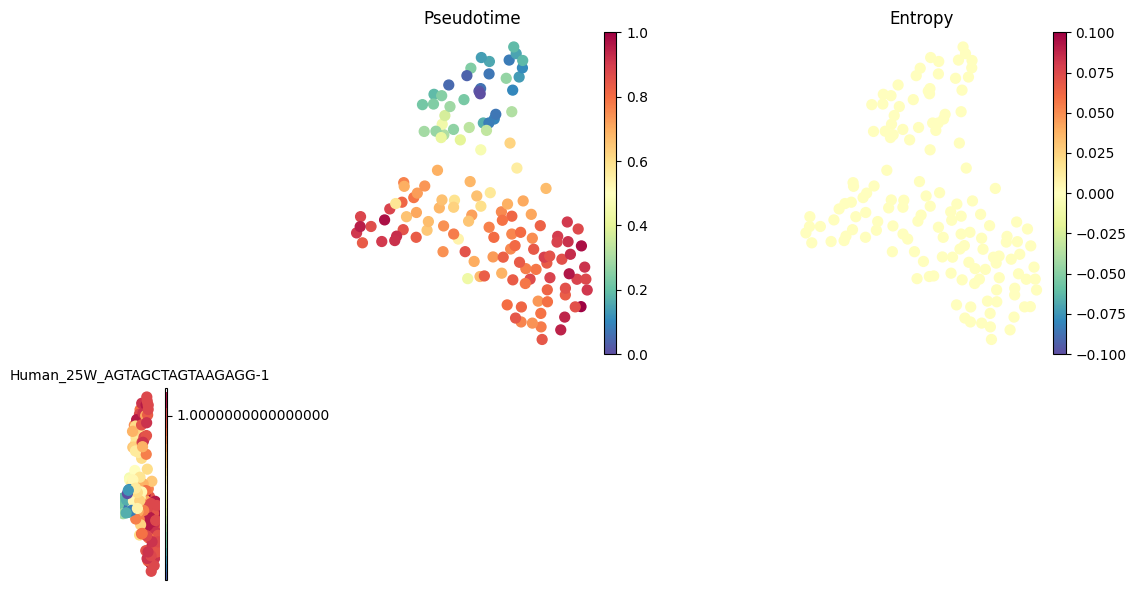

In [38]:
palantir.plot.plot_palantir_results(adata_count, s=50)
plt.show()

In [39]:
index, value = max(enumerate(adata_count[:,'ESRRG'].X), key=operator.itemgetter(1))
terminal_cell = adata_count.obs.index[index]
terminal_cell

'Human_25W_TCCGTGTTCTTAGTTC-1'

In [40]:
index, value = max(enumerate(adata_count[:,'LYPD1'].X), key=operator.itemgetter(1))
terminal_cell = adata_count.obs.index[index]
terminal_cell

'Human_26W_GGACGTCGTGCGCTCA-1'

In [41]:
index, value = max(enumerate(adata_count[:,'PCDH9'].X), key=operator.itemgetter(1))
terminal_cell = adata_count.obs.index[index]
terminal_cell

'Human_23W_AACAAGCCATTATGAC-1'

In [42]:
index, value = max(enumerate(adata_count[:,'PROX1'].X), key=operator.itemgetter(1))
terminal_cell = adata_count.obs.index[index]
terminal_cell

'Human_26W_ACGATGTGTAATGCTC-1'

In [43]:
terminal_states = pd.Series(
    ["ESRRG+","LYPD1+","PCDH9+","PROX1+"],
    index=["Human_25W_TCCGTGTTCTTAGTTC-1","Human_26W_GGACGTCGTGCGCTCA-1",
           "Human_23W_AACAAGCCATTATGAC-1","Human_26W_ACGATGTGTAATGCTC-1"],
)

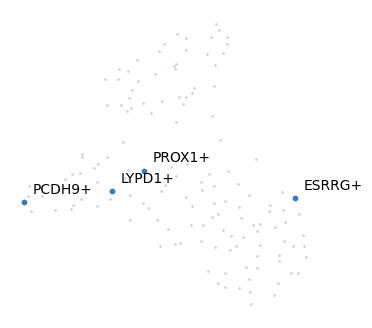

In [44]:
palantir.plot.highlight_cells_on_umap(adata_count, terminal_states)
plt.show()

In [45]:
start_cell = "Human_25W_TACAACGTCTACTTCA-1"
pr_res = palantir.core.run_palantir(
    adata_count, start_cell, num_waypoints=500, terminal_states=terminal_states
)

Sampling and flocking waypoints...
Time for determining waypoints: 0.00023330847422281902 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.00516666571299235 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9996
Correlation at iteration 2: 0.9999
Correlation at iteration 3: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


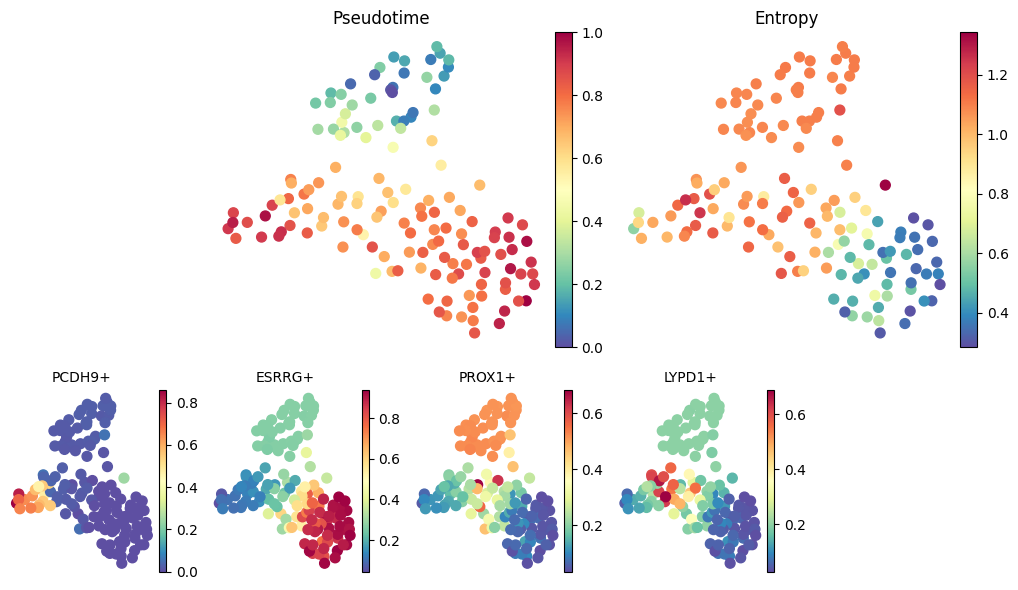

<Figure size 400x400 with 0 Axes>

In [46]:
palantir.plot.plot_palantir_results(adata_count, s=50)
plt.show()
fig = plt.gcf()
fig.savefig('figures/plot_palantir_celltypes.tiff', dpi=1200)

In [47]:
masks = palantir.presults.select_branch_cells(adata_count, q=.1, eps=.05)

ZeroDivisionError: integer division or modulo by zero

In [48]:
# obtain pr_res object
pr_res = palantir.core.run_palantir(adata_count, start_cell, num_waypoints=500)

Sampling and flocking waypoints...
Time for determining waypoints: 0.0002332766850789388 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...
Time for shortest paths: 0.0049713850021362305 minutes
Iteratively refining the pseudotime...
Correlation at iteration 1: 0.9996
Correlation at iteration 2: 0.9999
Correlation at iteration 3: 0.9999
Entropy and branch probabilities...
Markov chain construction...
Identification of terminal states...
Computing fundamental matrix and absorption probabilities...
Project results to all cells...


In [49]:
pr_res.branch_probs.columns

Index(['Human_25W_AGTAGCTAGTAAGAGG-1'], dtype='object')

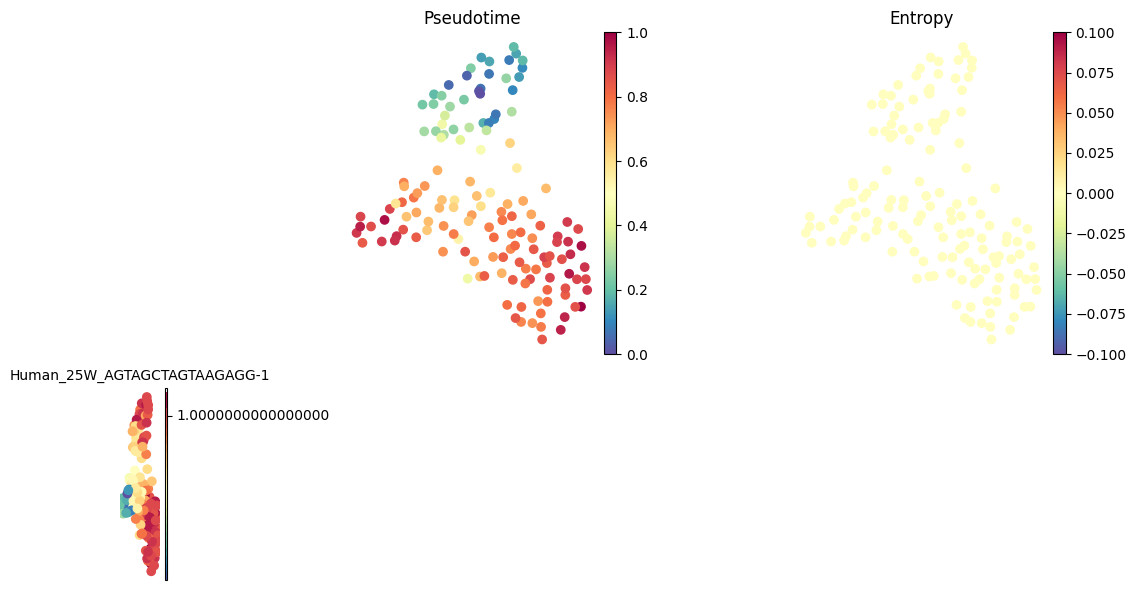

In [50]:
palantir.plot.plot_palantir_results(adata_count)
fig = plt.gcf()

#DPT

In [51]:
# load modules
import os
import numpy as np
import pandas as pd
import pickle

# Plotting imports
import matplotlib
import matplotlib.pyplot as plt

import palantir
import scanpy as sc

In [52]:
# Set the start / root cell
adata_count.uns['iroot'] = np.flatnonzero(adata_count.obs_names == adata_count.obs['palantir_pseudotime'].idxmin())[0]

In [53]:
sc.pp.pca(adata_count, n_comps=50)
sc.tl.tsne(adata_count);
sc.pp.neighbors(adata_count, 50)
sc.tl.diffmap(adata_count, 5)
sc.tl.dpt(adata_count, n_dcs=5, n_branchings=1, copy=False)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=5(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [ 1.          0.81226987  0.7097071   0.6350999  -0.5994187 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=5
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs)
    'dpt_groups', the branching subgroups of dpt (adata.obs)
    'dpt_order

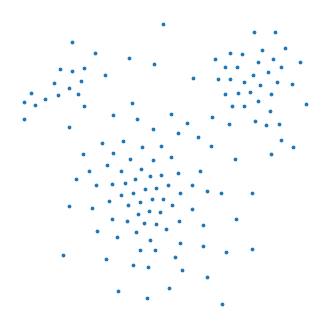

In [54]:
plt.scatter(adata_count.obsm['X_tsne'][:, 0], adata_count.obsm['X_tsne'][:, 1],
           s=3)
ax = plt.gca()
ax.set_axis_off()

G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
G:\Miniconda3\envs\scvi-env\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


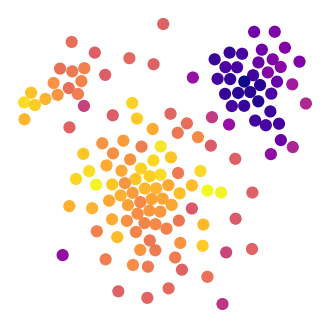

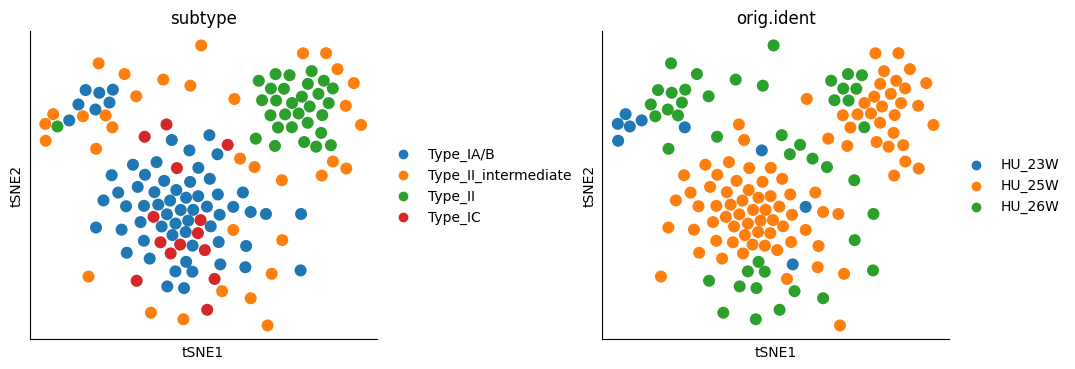

In [55]:
plt.scatter(adata_count.obsm['X_tsne'][:, 0], adata_count.obsm['X_tsne'][:, 1],
           s=60, c=adata_count.obs['dpt_pseudotime'], cmap=matplotlib.cm.plasma)
ax = plt.gca()
ax.set_axis_off()
sc.pl.tsne(adata_count,color=["subtype","orig.ident"], wspace=0.5,size=300)#legend_loc='on data',

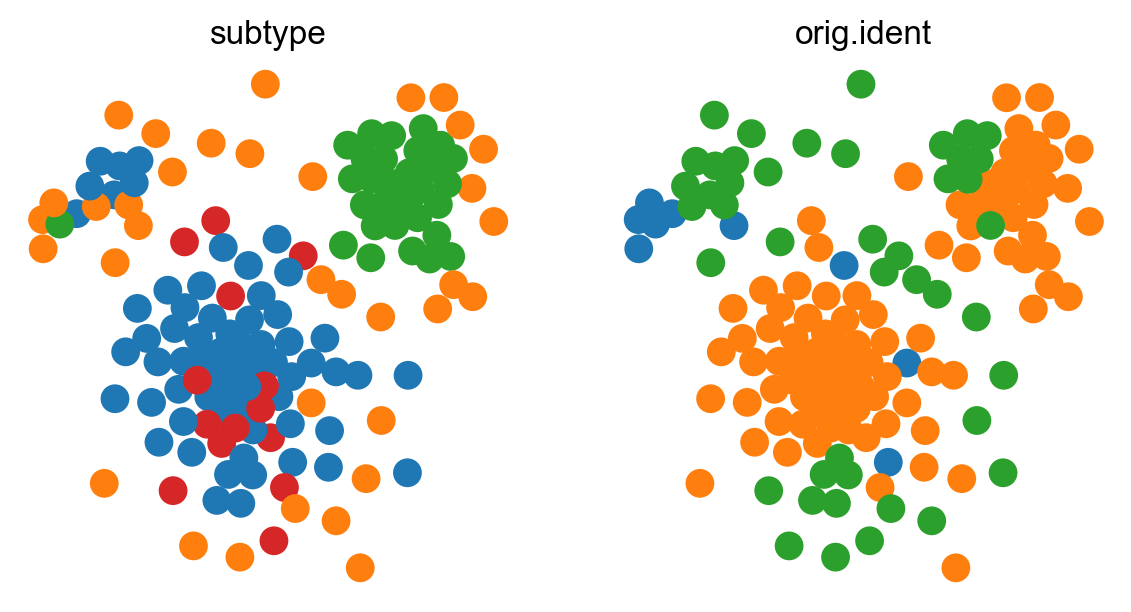

In [56]:
import scvelo as scv
scv.set_figure_params(figsize=(3.5,3.5))
scv.pl.tsne(adata_count,color=["subtype","orig.ident"])